# Разведочный анализ с использованием `pandas`

Для лабороторной работы используются массив данных "Best Selling Albums of All Time", его можно взять с сайта https://www.kaggle.com/datasets/ciroduro01/best-selling-albums-of-all-time/data?select=best_selling_albums.csv .

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [41]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [42]:
train = pd.read_csv('best_selling_albums.csv')

In [62]:
train.head()

,Album,Artist,Year,Sales_Millions,Decade,Country,Genre
0,Thriller,Michael Jackson,1982,70,1980s,USA,Pop
1,Back in Black,AC/DC,1980,50,1980s,Australia,Rock
2,The Dark Side of the Moon,Pink Floyd,1973,45,1970s,UK,Rock
3,The Bodyguard,Whitney Houston,1992,45,1990s,USA,Pop
4,Bat Out of Hell,Meat Loaf,1977,43,1970s,USA,Rock


Описание полей:


*   **Album**- название музыкального альбома
*   **Artist**- имя музыканта или группы
*   **Year**- год выпуска альбома
*   **Sales_Millions**- продажи альбома (в миллионах)
*   **Decade**- десятилетие, в которое вышел альбом
*   **Country**- страна артиста или группы
*   **Genre**-музыкальный жанр









Общая статистика числовых данных.

In [44]:
train.describe()

,Year,Sales_Millions
count,49.000000,49.000000
mean,1988.306122,30.734694
std,13.731357,9.346959
min,1957.000000,20.000000
25%,1977.000000,24.000000
50%,1987.000000,28.000000
75%,1999.000000,33.000000
max,2017.000000,70.000000


Анализ нечисловых данных.

In [45]:
train.describe(include=['O'])

,Album,Artist,Decade,Country,Genre
count,49,49,49,49,49
unique,49,38,7,5,10
top,Thriller,Michael Jackson,1980s,USA,Pop
freq,1,3,13,30,21


Обозначения:

`count` - количество непустых значений.

`unique` - количество уникальных записей.

`top` - наиболее часто повторяющаяся запись.

`freq` - частота самой частой записи.


Более полное представление о данных.

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Album           49 non-null     object
 1   Artist          49 non-null     object
 2   Year            49 non-null     int64 
 3   Sales_Millions  49 non-null     int64 
 4   Decade          49 non-null     object
 5   Country         49 non-null     object
 6   Genre           49 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.8+ KB


## Заполнение пропусков

Обнаружение недостающих значений.

In [47]:
train.isnull().sum()

,0
Album,0
Artist,0
Year,0
Sales_Millions,0
Decade,0
Country,0
Genre,0


Нет недостающих значений.

## Визуализация распределений и взаимосвязей

Гистограмма, демонстрирующая количество стран в этом наборе данных.

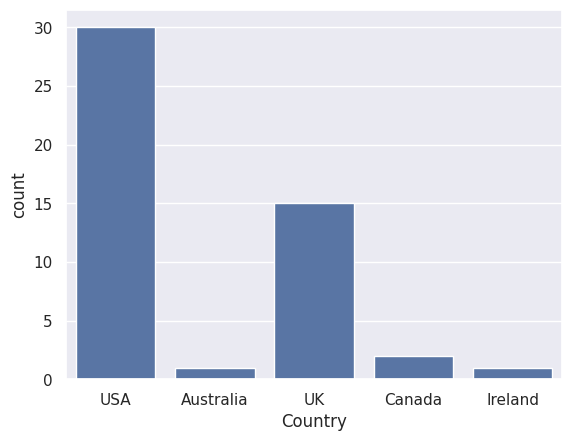

In [48]:
sns.countplot(x=train["Country"]);

Гистограмма, демонстрирующая количество десятилетий в этом наборе данных.

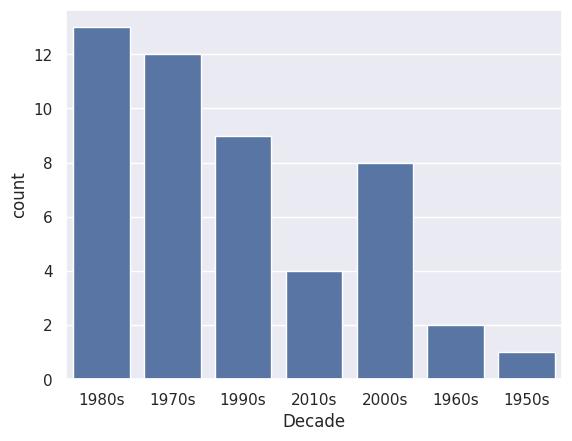

In [49]:
sns.countplot(x=train["Decade"]);

Гистограмма, демонстрирующая количество жанров в этом наборе данных.

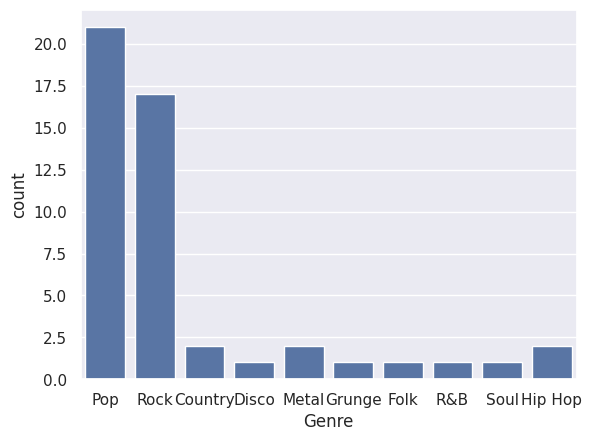

In [60]:
sns.countplot(x=train["Genre"]);

Гистограмма, демонстрирующая количество продаж альбомов в этом наборе данных.

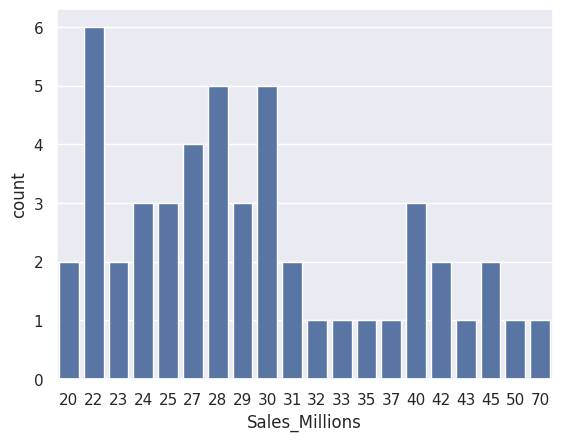

In [61]:
sns.countplot(x=train["Sales_Millions"]);

Гистограмма, демонстрирующая популярность определенных жанров в определенные десятилетия.

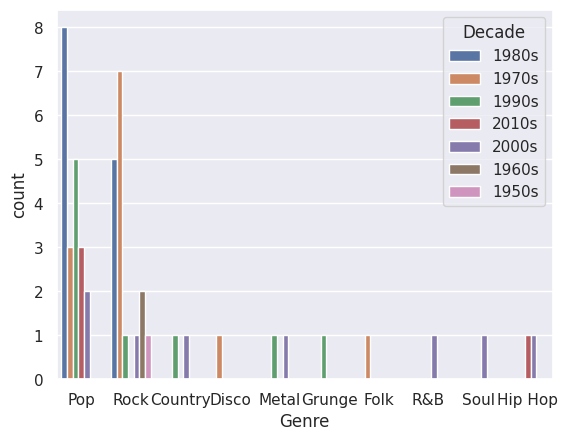

In [50]:
sns.countplot(data=train, x="Genre", hue='Decade');

Гистограмма, демонстрирующая популярность определенных жанров в определенные десятилетия.

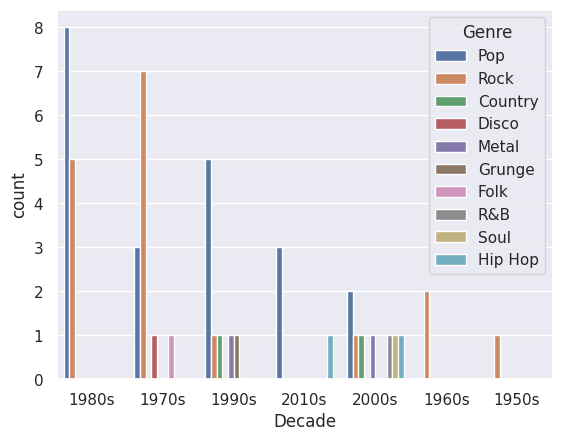

In [54]:
sns.countplot(data=train, x="Decade", hue='Genre');

Гистограмма, демонстрирующая популярность определенных жанров в определенных странах.

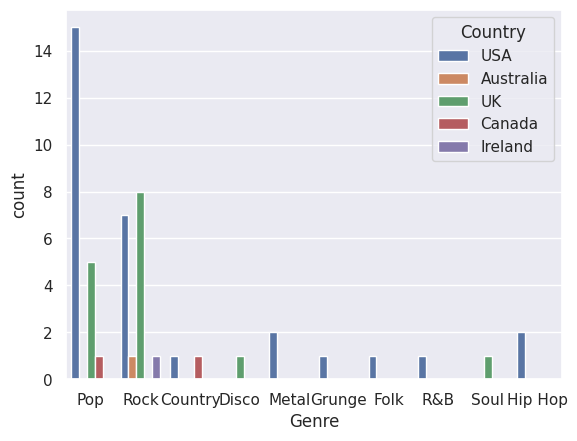

In [59]:
sns.countplot(data=train, x="Genre", hue='Country');

## Кодирование категориальных признаков

`OrdinalEncoder` и `OneHotEncoder` - часть библиотеки `scikit-learn` в Python и используются для преобразования категориальных или текстовых признаков в числа, которые предсказательные модели понимают лучше.

`sklearn.preprocessing.OrdinalEncoder` раздает категориальным признакам значения от 0 до $n$, где $n$ - это количество различных значений в данном столбце.

In [39]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[['Country', 'Genre', "Decade"]] = enc.fit_transform(train[['Country', 'Genre', "Decade"]])
train.head()

,Album,Artist,Year,Sales_Millions,Decade,Country,Genre
0,Thriller,Michael Jackson,1982,70,1980s,4.0,6.0
1,Back in Black,AC/DC,1980,50,1980s,0.0,8.0
2,The Dark Side of the Moon,Pink Floyd,1973,45,1970s,3.0,8.0
3,The Bodyguard,Whitney Houston,1992,45,1990s,4.0,6.0
4,Bat Out of Hell,Meat Loaf,1977,43,1970s,4.0,8.0


In [35]:
enc.categories_

[array(['Australia', 'Canada', 'Ireland', 'UK', 'USA'], dtype=object),
 array(['Country', 'Disco', 'Folk', 'Grunge', 'Hip Hop', 'Metal', 'Pop',
        'R&B', 'Rock', 'Soul'], dtype=object)]